<a href="https://colab.research.google.com/github/suyogk23/ipl-prediction-models-STARC/blob/main/UNIVARIATETSipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('ipl_data_s.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0.0,0.0,0.0,222.0
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.2,1,0.0,0.0,0.0,222.0
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.2,2,0.0,0.0,0.0,222.0
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.3,2,0.0,0.0,0.0,222.0
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,2,0,0.4,2,0.0,0.0,0.0,222.0


In [ ]:
df=df.drop(columns=['date','venue','bat_team','bowl_team','batsman','bowler','wickets','runs_last_5','wickets_last_5','striker','non-striker','total'])

In [ ]:
df.head()

,mid,runs,overs
0,1,1,0.1
1,1,1,0.2
2,1,2,0.2
3,1,2,0.3
4,1,2,0.4


CHECKING STATIONARITY OF DATA

In [ ]:
# Check the dimensionality of the dataset
df.shape
print("Dataset has {} records and {} columns".format(df.shape[0], df.shape[1]))

Dataset has 67401 records and 3 columns


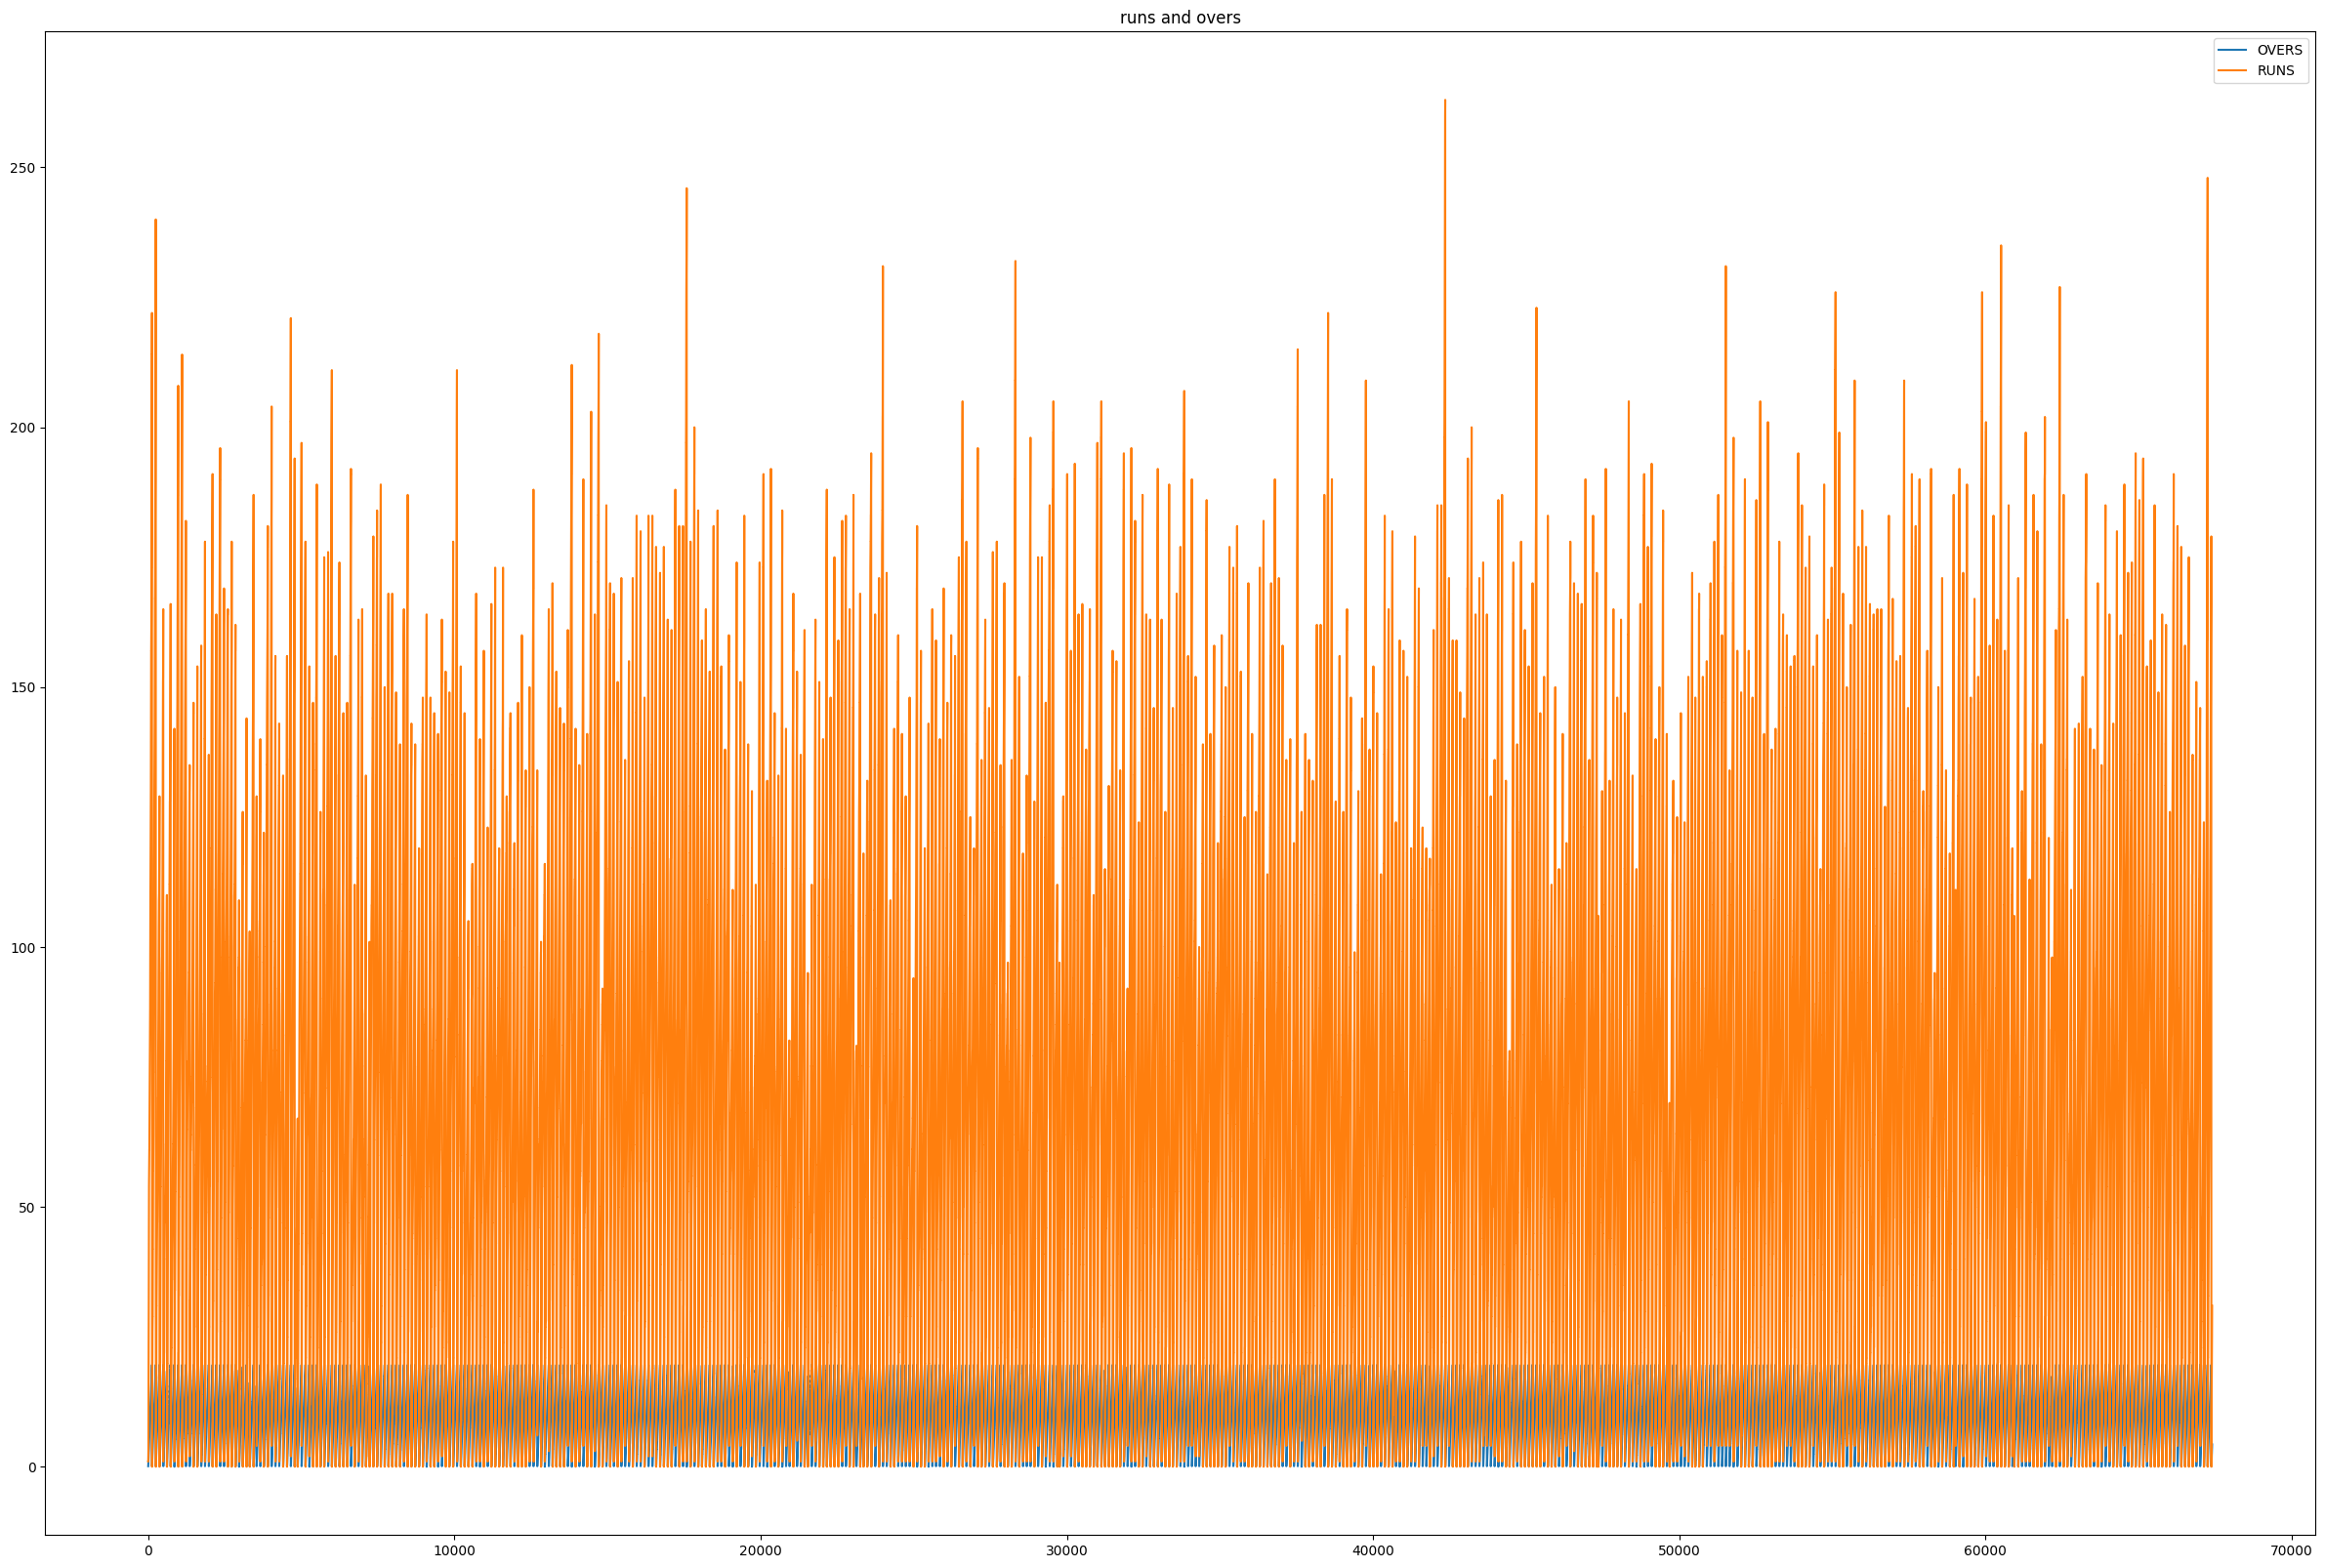

In [ ]:
#plotting the data
plt.figure(figsize=(30,20))
# Plot the data
plt.plot(df.index, df['overs'], label = "OVERS")
plt.plot(df.index, df['runs'], label = "RUNS")
plt.legend(loc='best')
plt.title("runs and overs")
plt.show()

In [ ]:
#augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
# Call the function and run the test

In [ ]:
#for runs
adf_test(df['runs'])

Results of Dickey-Fuller Test:
Test Statistic                   -45.143342
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    67338.000000
Critical Value (1%)               -3.430447
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [ ]:
#for overs
adf_test(df['overs'])

Results of Dickey-Fuller Test:
Test Statistic                   -56.720320
p-value                            0.000000
#Lags Used                        62.000000
Number of Observations Used    67338.000000
Critical Value (1%)               -3.430447
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


AUTO ARIMA - UNIVARIATE TS

In [ ]:
#dividing data into train and test parts
train = df.sample(frac=0.8, random_state=25)
valid = df.drop(train.index)

In [ ]:
dt=df

In [ ]:
df=dt

In [ ]:
df=df.drop(columns=['mid','overs'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=571659.829, Time=112.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=571657.065, Time=1.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=571658.236, Time=2.76 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=571658.255, Time=4.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=636719.745, Time=1.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=571660.226, Time=5.87 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 127.982 seconds


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


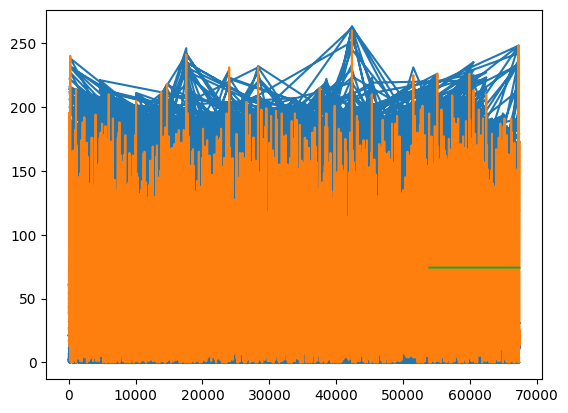

In [ ]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
predMean=forecast['Prediction'].mean()
print(predMean)

74.25257320895389


In [ ]:
valid['runs'].dropna(inplace=True)
forecast=forecast.fillna(predMean)

In [ ]:
forecast

,Prediction
20,74.252573
22,74.252573
28,74.252573
39,74.252573
49,74.252573
...,...
67384,74.252573
67387,74.252573
67389,74.252573
67391,74.252573


In [ ]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)

48.70080595875478


RMSE VALUE OF UNIVARIATE WITH ONLY RUNS AS VARIABLE VERY HIGH